## IMPORT LIBARARIES

In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import save_model

/Users/aakriti/Desktop/Extracurricular/ML/myenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## LOADING THE MNIST DATASET

In [2]:
(xtrain, ytrain), (xtest, ytest) = load_data()

#Reshaping the training and testing data
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], xtest.shape[2], 1))

In [3]:
#Normalizing the values of pixels of images

xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

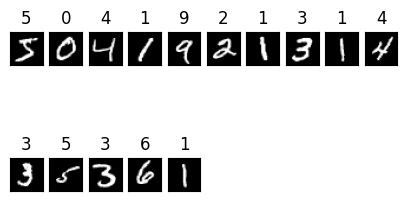

In [4]:
#Plotting

fig = plt.figure(figsize=(5,3))

for i in range(15):
    ax = fig.add_subplot(2, 10, i+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(xtrain[i]) , cmap = 'gray')
    ax.set_title(ytrain[i])

In [5]:
img_shape = xtrain.shape[1:]
print(img_shape)

(28, 28, 1)


## DEFINING THE MODEL

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)             

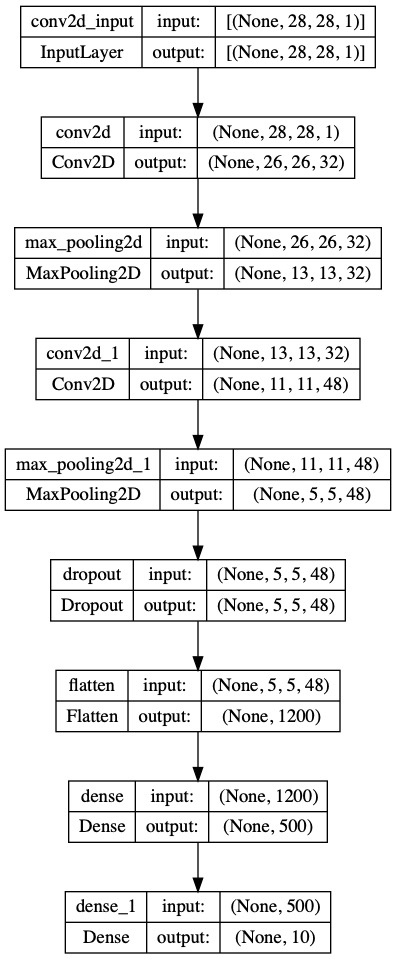

In [7]:
plot_model(model, 'model.jpg', show_shapes=True)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x = model.fit(xtrain, ytrain, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 8s - loss: 0.2440 - accuracy: 0.9246 - val_loss: 0.0625 - val_accuracy: 0.9835 - 8s/epoch - 18ms/step
Epoch 2/10
422/422 - 7s - loss: 0.0802 - accuracy: 0.9743 - val_loss: 0.0374 - val_accuracy: 0.9900 - 7s/epoch - 17ms/step
Epoch 3/10
422/422 - 7s - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0460 - val_accuracy: 0.9868 - 7s/epoch - 18ms/step
Epoch 4/10
422/422 - 8s - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0303 - val_accuracy: 0.9917 - 8s/epoch - 18ms/step
Epoch 5/10
422/422 - 8s - loss: 0.0427 - accuracy: 0.9859 - val_loss: 0.0283 - val_accuracy: 0.9923 - 8s/epoch - 18ms/step
Epoch 6/10
422/422 - 8s - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0257 - val_accuracy: 0.9927 - 8s/epoch - 18ms/step
Epoch 7/10
422/422 - 8s - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0276 - val_accuracy: 0.9923 - 8s/epoch - 18ms/step
Epoch 8/10
422/422 - 7s - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0320 - val_accuracy: 0.9910 - 7s/epoch - 17ms/step
Epoch 9/10
422/4

In [9]:
loss, accuracy = model.evaluate(xtest, ytest, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.39000010490417


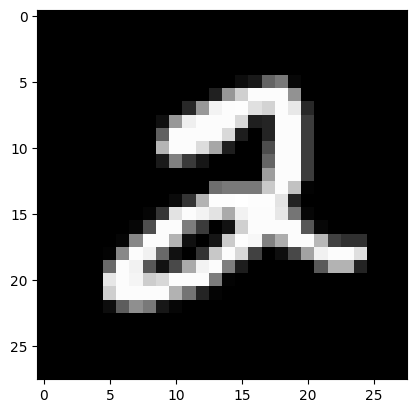

In [10]:
img = xtrain[5]

plt.imshow(np.squeeze(img), cmap='gray')
plt.show()

In [ ]:
# Replace 'your_model.h5' with the desired file name
model.save('mnist_model.h5')